# 详解 sns.heatmap()

`sns.heatmap()` 是 Seaborn 库中用于绘制热力图(heatmap)的函数，它能够将矩阵数据可视化为颜色矩阵，通过颜色的深浅或色调的变化来展示数据的大小关系。

## 基本语法

```python
sns.heatmap(data, 
            vmin=None, 
            vmax=None, 
            cmap=None, 
            center=None, 
            robust=False, 
            annot=None, 
            fmt='.2g', 
            annot_kws=None, 
            linewidths=0, 
            linecolor='white', 
            cbar=True, 
            cbar_kws=None, 
            cbar_ax=None, 
            square=False, 
            xticklabels='auto', 
            yticklabels='auto', 
            mask=None, 
            ax=None, 
            **kwargs)
```

## 主要参数详解

### 数据相关参数

1. **data**: 2D 数据集，可以是 DataFrame 或数组
   - 这是热力图的核心数据，通常是一个矩阵或数据框

2. **vmin, vmax**: 颜色条的最小值和最大值
   - 用于指定颜色映射的范围
   - 如果不指定，会自动根据数据确定

3. **center**: 指定颜色映射的中心值
   - 在绘制发散型数据时特别有用

4. **robust**: 布尔值，默认为 False
   - 如果为 True，则使用稳健分位数计算颜色映射范围，而不是极值

### 颜色相关参数

5. **cmap**: 颜色映射
   - 可以是字符串(如 'viridis', 'coolwarm', 'YlOrRd')或 matplotlib 的 colormap 对象
   - 常用选项: 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'coolwarm', 'YlOrRd'

6. **annot**: 布尔值或矩形数据，默认为 None
   - 如果为 True，则在每个单元格中显示数据值
   - 也可以传递与 data 形状相同的数组来显示自定义注释

7. **fmt**: 字符串，默认为 '.2g'
   - 设置注释文本的字符串格式
   - 例如 '.2f' 表示保留两位小数

### 外观相关参数

8. **linewidths**: 数字，默认为 0
   - 设置划分每个单元格的线条宽度

9. **linecolor**: 颜色，默认为 'white'
   - 设置划分单元格的线条颜色

10. **cbar**: 布尔值，默认为 True
    - 是否绘制颜色条

11. **square**: 布尔值，默认为 False
    - 如果为 True，则将坐标轴设置为正方形

12. **xticklabels, yticklabels**: 'auto', 布尔值，列表或整数，默认为 'auto'
    - 控制x轴和y轴标签的显示

### 高级参数

13. **mask**: 布尔数组或 DataFrame，默认为 None
    - 用于隐藏某些数据(True的位置会被隐藏)

14. **cbar_kws**: 字典
    - 传递给颜色条的额外关键字参数

15. **annot_kws**: 字典
    - 传递给注释文本的额外关键字参数(如大小、颜色等)

## 使用示例

### 基本示例

```python
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 创建数据
data = np.random.rand(10, 12)

# 绘制热力图
sns.heatmap(data)
plt.show()
```

### 进阶示例

```python
# 使用真实数据集
flights = sns.load_dataset("flights").pivot("month", "year", "passengers")

# 绘制带有注释和自定义颜色的热力图
plt.figure(figsize=(10, 8))
sns.heatmap(flights, 
            annot=True, 
            fmt="d", 
            cmap="YlOrRd", 
            linewidths=.5, 
            cbar_kws={'label': 'Passengers'})
plt.title("Monthly Flight Passengers")
plt.show()
```

### 使用掩码(mask)的示例

```python
# 创建相关矩阵
corr = np.corrcoef(np.random.randn(10, 200))

# 创建掩码(只显示下三角)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 绘制热力图
sns.heatmap(corr, 
            mask=mask, 
            cmap='coolwarm', 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})
plt.title("Correlation Matrix (Lower Triangle)")
plt.show()
```

## 实际应用场景

1. **相关性矩阵可视化**：展示变量间的相关性
2. **缺失值分析**：显示数据集中缺失值的分布
3. **混淆矩阵**：评估分类模型的性能
4. **基因表达数据**：在生物信息学中展示基因表达水平
5. **地理空间数据**：显示地理区域上的数值分布

热力图是一种强大的可视化工具，能够直观地展示复杂数据中的模式和关系。通过调整各种参数，可以创建出既美观又富有信息量的可视化效果。

In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 示例1

,year,month,passengers
142,1960,November,390
93,1956,October,306
27,1951,April,163
94,1956,November,271
133,1960,February,391
116,1958,September,404
121,1959,February,342
130,1959,November,362
77,1955,June,315
4,1949,May,121


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
September,136,158,184,209,237,259,312,355,404,404,463,508
May,121,125,172,183,229,234,270,318,355,363,420,472
February,118,126,150,180,196,188,233,277,301,318,342,391
October,119,133,162,191,211,229,274,306,347,359,407,461
March,132,141,178,193,236,235,267,317,356,362,406,419
December,118,140,166,194,201,229,278,306,336,337,405,432
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
April,129,135,163,181,235,227,269,313,348,348,396,461


<Axes: xlabel='year', ylabel='month'>

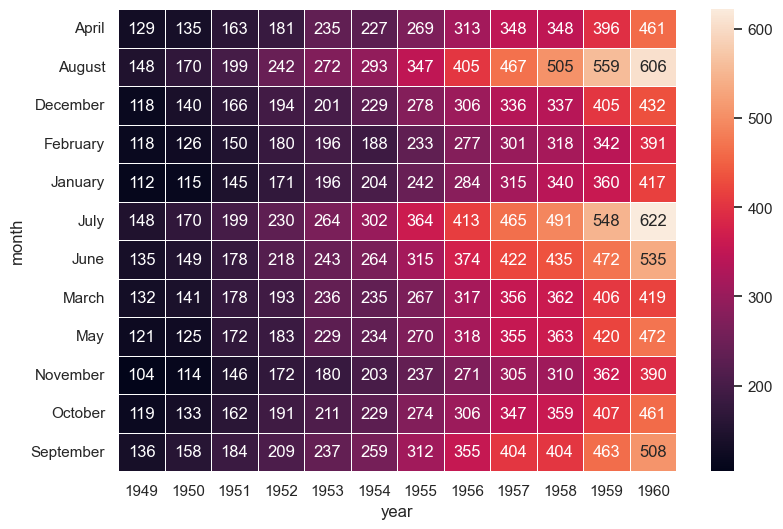

In [7]:
# set_theme() 是 Seaborn 中用于设置绘图主题和样式的函数，它会一次性设置多种绘图参数，包括：
#     图形风格 (style)
#     调色板 (palette)
#     字体 (font)
#     网格线 (grid)
#     其他美学参数
sns.set_theme()
# 加载 Seaborn 内置的航班数据集
# 这是一个长格式(long-form)的数据集，包含三列：
#     year: 年份 (1949-1960)
#     month: 月份 (Jan-Dec)
#     passengers: 乘客数量
flights_long = pd.read_csv("seaborn-data/flights.csv")
display(flights_long.sample(10))

# 将长格式数据转换为宽格式(wide-form)，创建一个矩阵：
#     index="month": 行索引为月份
#     columns="year": 列索引为年份
#     values="passengers": 单元格值为乘客数量
# 外层()的作用
#   1. 隐式续行             括号允许将一条长语句分成多行书写，而不需要使用反斜杠\显式续行。这是Python的语法特性，任何在括号内的表达式都可以自动跨行。
#   2. 链式方法调用的可读性  括号特别用于提高链式方法调用（这里是pivot()的可读性
flights = (
    flights_long
    .pivot(
        index="month",
        columns="year",
        values="passengers")
)
display(flights.sample(10))

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    flights,        # 要可视化的数据矩阵
    annot=True,     # 在每个单元格中显示数值
                    # 对于这个数据集，会显示乘客数量
    fmt="d",        # 指定数值显示格式为十进制整数
    linewidths=.5,  # 设置单元格之间的线条宽度为0.5, 使热力图有清晰的网格分隔
    ax=ax           # 指定在哪个坐标轴上绘制, 确保热力图绘制在我们创建的图形上
)

## 可视化结果分析

这段代码最终会生成一个热力图：
- x轴：年份 (1949-1960)
- y轴：月份 (Jan-Dec)
- 颜色深浅：表示乘客数量多少
- 单元格中的数字：具体乘客数量

通过这个热力图，可以直观地观察到：
1. 每年夏季(6-8月)乘客数量较多(颜色较深)
2. 冬季(11-1月)乘客数量较少(颜色较浅)
3. 随着时间的推移，每年的乘客数量总体呈增长趋势

这种可视化方式非常适合展示时间序列数据的周期性模式和长期趋势。

这段代码使用Seaborn和Matplotlib创建了一个带有掩码(mask)的相关性矩阵热力图。

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,...,-0.951219,0.832973,-1.000208,0.343463,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497
1,-1.230374,0.205848,0.821371,-0.493780,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,...,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,-1.094711,-1.654707
2,-0.023842,-0.363738,-0.482943,0.739577,0.611252,0.491802,1.792924,-0.683737,1.054113,-0.615562,...,-1.120717,0.991136,1.630796,-1.900090,0.062316,0.479998,0.379609,-1.512245,0.289020,0.095524
3,-0.292821,0.856582,0.933473,-0.421045,1.590430,-1.063801,2.104884,-1.090494,1.484521,-1.089229,...,0.230258,0.195235,0.535839,0.684299,2.821279,0.916504,0.150722,0.017747,0.006885,0.329035
4,-0.587376,1.751572,0.308274,-0.894283,-0.769156,0.869197,0.371381,-0.628362,-0.922477,-0.903391,...,1.519031,0.749896,-2.269087,-0.760599,-0.955502,0.923951,0.315157,1.340910,0.678992,0.594258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.036298,-1.177101,-2.472118,-0.370044,0.108184,-0.753487,-0.331042,2.203373,-0.319100,0.428793,...,-0.087225,0.190644,-0.506678,-0.442679,-1.186259,0.743655,-1.842236,0.702369,-0.726212,-0.792110
96,-0.681074,2.203923,1.555724,-0.808559,-1.415792,0.586590,0.393986,0.455118,-0.050184,1.298277,...,-0.607768,0.051741,-1.183910,0.830444,0.911260,-1.470621,-0.450259,-1.146024,-0.548446,-0.016534
97,0.616011,0.162773,-0.425326,2.040243,0.339979,0.489751,1.030780,1.061831,-0.040148,-1.406366,...,-1.248445,-0.530126,-0.045328,1.314023,-0.203060,0.767502,2.055105,-0.131154,-1.185281,-0.208766
98,-1.268506,-0.815121,-1.670919,-1.103345,-1.348075,0.157345,0.249971,0.581991,0.115223,-0.898088,...,0.227623,-0.147131,0.692395,-1.308567,-1.197288,-1.348862,-1.612158,0.968366,-0.936233,-0.733935


,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,1.000000,-0.107401,-0.086468,0.000131,0.035047,0.004749,0.028226,0.000422,0.132100,0.057720,...,0.073645,-0.055396,-0.058241,-0.123823,0.096451,-0.015178,0.172725,0.003791,0.005531,-0.011534
B,-0.107401,1.000000,0.254632,0.061506,0.043581,-0.078019,0.069133,-0.211278,-0.011796,0.085277,...,0.031315,0.100451,-0.103068,0.011187,-0.008536,-0.030730,-0.022978,-0.050483,-0.014468,0.078737
C,-0.086468,0.254632,1.000000,-0.033682,-0.127464,0.141223,0.164793,-0.188574,-0.230059,0.145777,...,0.010497,0.051872,0.084793,0.167976,-0.043806,-0.057125,0.125580,-0.068426,-0.052764,0.094661
D,0.000131,0.061506,-0.033682,1.000000,0.086054,-0.153212,-0.000963,-0.017282,-0.109283,0.011056,...,-0.136959,-0.061816,0.134112,0.081143,0.124706,0.194911,-0.016944,-0.116963,0.054315,0.014383
E,0.035047,0.043581,-0.127464,0.086054,1.000000,-0.007159,0.157224,-0.096254,0.043785,0.015117,...,0.090499,0.041276,0.076138,0.027021,0.069976,-0.021745,0.104822,-0.047913,0.120465,0.080980
F,0.004749,-0.078019,0.141223,-0.153212,-0.007159,1.000000,0.000694,0.177026,0.042653,-0.011992,...,-0.085279,-0.006506,0.045742,-0.078655,0.144003,-0.032806,-0.058346,-0.088144,0.140197,-0.041734
G,0.028226,0.069133,0.164793,-0.000963,0.157224,0.000694,1.000000,-0.210589,0.069587,-0.012931,...,0.063189,-0.112279,0.127490,0.082824,0.122612,-0.143536,-0.086616,0.236790,-0.113686,-0.115924
H,0.000422,-0.211278,-0.188574,-0.017282,-0.096254,0.177026,-0.210589,1.000000,0.121493,0.002968,...,-0.024620,-0.072468,-0.062851,-0.015150,-0.027060,-0.017284,-0.011716,-0.107324,-0.123002,0.106077
I,0.132100,-0.011796,-0.230059,-0.109283,0.043785,0.042653,0.069587,0.121493,1.000000,-0.025739,...,-0.017605,-0.063593,-0.052682,-0.032076,0.034641,-0.028543,0.001416,0.021757,0.086530,0.105079
J,0.057720,0.085277,0.145777,0.011056,0.015117,-0.011992,-0.012931,0.002968,-0.025739,1.000000,...,0.027025,-0.004981,-0.138156,0.258781,0.004367,0.078004,0.086562,0.005363,-0.026048,0.043638


<Axes: >

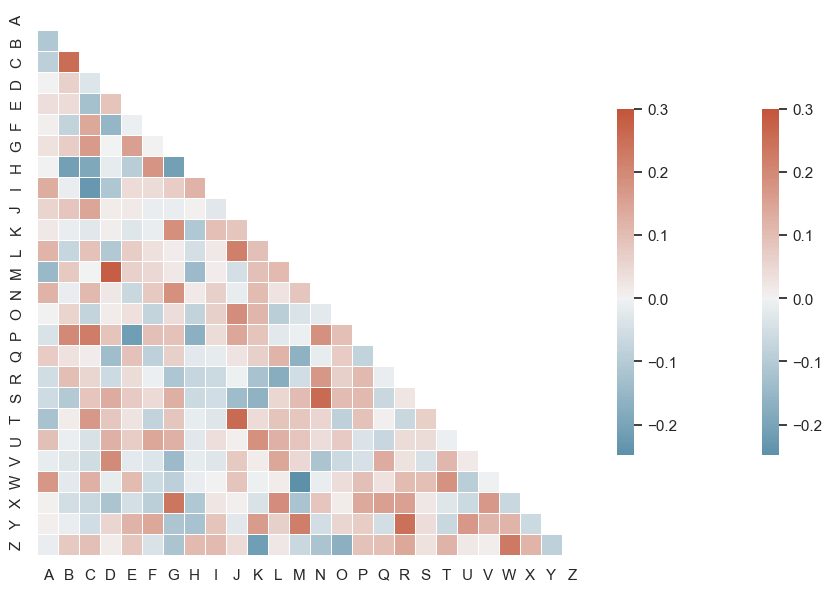

In [10]:
sns.set_theme(style="white")
# Generate a large random dataset
rs = np.random.RandomState(33)      # 创建随机数生成器，种子为33（确保可重复性）
d = pd.DataFrame(data=rs.normal(size=(100, 26)),    # 生成100行×26列的正态分布随机数据
                 columns=list(ascii_letters[26:]))  # 使用ASCII字母表的后26个字母（A-Z）作为列名, ascii_letters是string模块中的常量，包含'a-zA-Z'

display(d)

# Compute the correlation matrix
corr = d.corr()     # 计算DataFrame各列之间的皮尔逊相关系数. 结果是一个26×26的对称矩阵，对角线值为1（每个变量与自身的相关性）
display(corr)

# Generate a mask for the upper triangle
mask = np.triu(     # 提取矩阵的上三角部分（包括对角线），其余位置为0
    np.ones_like(corr, dtype=bool)  # 创建与corr形状相同的全1数组, 将数据类型转换为布尔型
    )               # 最终得到一个上三角为True，其余为False的掩码矩阵

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# 创建发散型颜色调色板
#     230: 起始色相（蓝色区域）
#     20: 结束色相（红色区域）
#     as_cmap=True: 返回matplotlib的Colormap对象而非颜色列表
# 这种颜色方案适合显示相关性（正值和负值）
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,                # 相关性矩阵数据
    mask=mask,           # 掩码（隐藏上三角）
    cmap=cmap,           # 自定义颜色映射
    vmax=.3,             # 颜色条最大值
    center=0,            # 颜色中心点（0表示正负值对称）
    square=True,         # 使单元格呈正方形
    linewidths=.5,       # 单元格边界线宽度
    cbar_kws={"shrink": .5}  # 颜色条参数（缩小为50%）
)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 可视化效果分析
最终图形将显示：
1. 下三角部分：变量A-Z之间的相关性矩阵
2. 颜色：
   - 深蓝色：强正相关（接近+0.3）
   - 白色：无相关（接近0）
   - 深红色：强负相关（接近-0.3）
3. 对角线：由于是变量与自身的相关性，被掩码隐藏

这种可视化常用于：
- 探索数据集中的变量关系
- 识别高度相关的变量对
- 在特征选择前分析特征相关性

# 详解 sns.clustermap()

`sns.clustermap()` 是 Seaborn 库中一个功能强大的函数，用于创建层次聚类热图（hierarchically clustered heatmap）。它将热图与层次聚类结合起来，可以直观地展示数据矩阵中的模式和相似性。

## 基本功能

```python
seaborn.clustermap(data, 
                   pivot_kws=None, 
                   method='average', 
                   metric='euclidean', 
                   z_score=None, 
                   standard_scale=None, 
                   figsize=(10, 10), 
                   cbar_kws=None, 
                   row_cluster=True, 
                   col_cluster=True, 
                   row_linkage=None, 
                   col_linkage=None, 
                   row_colors=None, 
                   col_colors=None, 
                   mask=None, 
                   dendrogram_ratio=0.2, 
                   colors_ratio=0.03, 
                   cbar_pos=(0.02, 0.8, 0.05, 0.18), 
                   tree_kws=None, 
                   **kwargs)
```

## 主要参数详解

### 数据相关参数

1. **data**: 2D 数组或 DataFrame
   - 输入数据，可以是矩形数组或 DataFrame

2. **pivot_kws**: dict, 可选
   - 如果数据是整洁格式（long-form），这个字典会传递给 pandas.pivot 来生成矩形矩阵

3. **z_score**: int 或 None, 可选
   - 对行(0)或列(1)进行 Z-score 标准化
   - 使数据以0为中心，标准差为1

4. **standard_scale**: int 或 None, 可选
   - 对行(0)或列(1)进行标准化，使值在0-1之间

### 聚类相关参数

5. **method**: str, 可选
   - 用于聚类的链接方法，默认为 'average'
   - 可选值: 'single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'

6. **metric**: str, 可选
   - 用于距离计算的度量方法，默认为 'euclidean'
   - 可选值: 'euclidean', 'minkowski', 'cityblock', 'sqeuclidean', 'cosine', 'correlation' 等

7. **row_cluster/col_cluster**: bool, 可选
   - 如果为 True，则对行/列进行聚类

8. **row_linkage/col_linkage**: numpy.ndarray, 可选
   - 预计算的行/列链接矩阵

### 可视化相关参数

9. **figsize**: tuple, 可选
   - 图形大小 (宽度, 高度)

10. **dendrogram_ratio**: float 或 tuple, 可选
    - 树状图占总图的比例
    - 如果是元组，则为 (行比例, 列比例)

11. **colors_ratio**: float, 可选
    - 侧边颜色条的比例

12. **cbar_kws**: dict, 可选
    - 传递给 `heatmap()` 的颜色条参数

13. **row_colors/col_colors**: list-like 或 DataFrame, 可选
    - 用于标记行/列的额外颜色信息

## 使用示例

### 基本使用

```python
import seaborn as sns
import matplotlib.pyplot as plt

# 加载示例数据集
iris = sns.load_dataset('iris')
species = iris.pop("species")

# 创建聚类热图
g = sns.clustermap(iris, figsize=(7, 5))
plt.show()
```

### 高级用法

```python
# 标准化数据并自定义聚类方法
g = sns.clustermap(iris, 
                   standard_scale=1,  # 标准化列
                   method='ward',     # 使用ward方法聚类
                   metric='euclidean',
                   figsize=(10, 8),
                   cmap="vlag",       # 使用vlag颜色映射
                   dendrogram_ratio=(0.1, 0.2),  # 调整树状图比例
                   cbar_pos=(0.05, 0.85, 0.05, 0.1))  # 调整颜色条位置

# 添加行标签
for label in species.unique():
    g.ax_col_dendrogram.bar(0, 0, color="white", label=label)
    
g.ax_col_dendrogram.legend(loc="center", ncol=3)
plt.show()
```

## 输出解释

`clustermap()` 返回一个 `ClusterGrid` 对象，包含以下主要属性：

- **data**: 聚类和标准化后的数据
- **ax_heatmap**: 热图的 Axes 对象
- **ax_col_dendrogram**: 列树状图的 Axes 对象
- **ax_row_dendrogram**: 行树状图的 Axes 对象
- **ax_cbar**: 颜色条的 Axes 对象

## 应用场景

1. **基因表达数据分析**：展示基因在不同条件下的表达模式
2. **市场细分**：识别具有相似购买行为的客户群体
3. **质量控制**：检测生产过程中的异常模式
4. **时间序列分析**：识别具有相似模式的时间段

## 注意事项

1. 对于大数据集，计算距离矩阵可能会很耗时
2. 不同的聚类方法和距离度量可能会产生不同的结果
3. 数据标准化方法的选择会影响聚类结果
4. 可以通过调整 `dendrogram_ratio` 来平衡热图和树状图的比例

`clustermap()` 是一个强大的工具，可以揭示数据中的潜在结构和模式，特别适用于探索性数据分析。

# `sns.clustermap()` 与 `sns.heatmap()` 对比详解

Seaborn 中的这两个函数都用于创建热图，但在功能和用途上有显著差异。以下是它们的详细对比：

## 1. 基本功能对比

| 特性                | `heatmap()`                          | `clustermap()`                          |
|---------------------|-------------------------------------|----------------------------------------|
| **主要功能**         | 展示矩形数据矩阵的颜色编码          | 展示聚类后的数据矩阵（热图+层次聚类）   |
| **聚类功能**         | 无                                  | 内置行列层次聚类                        |
| **树状图**           | 不生成                              | 自动生成行列树状图                      |
| **数据排序**         | 保持原始顺序                        | 按聚类结果重新排序                      |

## 2. 参数对比

### 共同参数
两者都支持这些常见参数：
- `data`: 输入数据矩阵
- `cmap`: 颜色映射
- `annot`: 是否显示数值
- `fmt`: 数值格式
- `cbar`: 是否显示颜色条
- `vmin/vmax`: 颜色范围限制

### 特有参数
**heatmap()特有**：
- `linewidths`: 单元格边界线宽
- `linecolor`: 单元格边界颜色
- `square`: 是否使单元格为正方形

**clustermap()特有**：
- `row_cluster/col_cluster`: 是否对行/列聚类
- `method/metric`: 聚类方法和距离度量
- `z_score/standard_scale`: 数据标准化选项
- `dendrogram_ratio`: 树状图比例

## 3. 可视化输出对比

**heatmap()输出**：
```
[原始数据矩阵]
+-----+-----+-----+
| A1  | B1  | C1  |
+-----+-----+-----+
| A2  | B2  | C2  |
+-----+-----+-----+
```

**clustermap()输出**：
```
[行树状图]  [颜色条]
    +-----------------+
    | 聚类后的热图矩阵 |
    +-----------------+
          [列树状图]
```

## 4. 性能对比

- **计算复杂度**：
  - `heatmap()`: O(n²) (仅渲染)
  - `clustermap()`: O(n³) (需要计算距离矩阵和聚类)

- **大数据集适用性**：
  - `heatmap()`: 适合大型数据集(1000+行列)
  - `clustermap()`: 适合中小型数据集(<500行列)

## 5. 典型应用场景对比

**使用heatmap()当**：
- 数据已有有意义的排序(如时间序列)
- 只需要可视化原始数据分布
- 处理大型数据集
- 需要更精细的热图样式控制

**使用clustermap()当**：
- 想发现数据中的自然分组
- 需要探索行列之间的关系
- 中等规模数据集
- 需要同时显示聚类结果和热图

## 6. 代码示例对比

### heatmap()示例
```python
import seaborn as sns
import matplotlib.pyplot as plt

flights = sns.load_dataset("flights").pivot("month", "year", "passengers")
sns.heatmap(flights, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title("Monthly Passenger Counts")
plt.show()
```

### clustermap()示例
```python
iris = sns.load_dataset("iris")
species = iris.pop("species")
sns.clustermap(iris, 
               method="ward", 
               metric="euclidean", 
               z_score=1, 
               cmap="vlag", 
               figsize=(8, 8))
plt.suptitle("Iris Features Clustering")
plt.show()
```

## 7. 如何选择

1. **是否需要聚类**：
   - 是 → clustermap()
   - 否 → heatmap()

2. **数据规模**：
   - 大(>500元素) → heatmap()
   - 中小 → 两者均可

3. **排序重要性**：
   - 保持原序 → heatmap()
   - 按相似度排序 → clustermap()

4. **展示需求**：
   - 只需值分布 → heatmap()
   - 需展示数据结构 → clustermap()

## 8. 进阶技巧

**结合使用**：可以先使用clustermap()确定最佳排序，然后用heatmap()生成更精美的可视化：
```python
# 先用clustermap获取排序
g = sns.clustermap(data, method='average')
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# 再用heatmap绘制
sns.heatmap(data.iloc[row_order, col_order], cmap="viridis")
```

这两个函数各有优势，根据具体分析需求选择使用，有时配合使用能获得更好的可视化效果。

network           1                      2                     3             \
node              1                      1                     1              
hemi             lh          rh         lh         rh         lh         rh   
94        76.765182   63.481773  -0.996659   6.949177   5.850911  17.528893   
15       -18.445438  -13.101379  29.976654  23.518087   2.768352 -34.169147   
817     -102.518944 -100.902924 -58.040295 -72.337677  41.179375  44.894493   
218       70.740616  101.120255 -10.914494 -55.003506   0.172926  -7.167471   
33         7.078829    1.535139  -1.216363  -0.978630   0.793556  -6.480469   
188      -34.313190  -47.403164 -10.731991 -17.044691  -6.036630 -28.909439   
812      103.105179   78.124931  10.327139   1.361326 -32.346245  -2.457763   
363      -29.195248  -17.389280   6.494746 -50.343899 -23.084412   2.952431   
450       34.470135   36.510311   8.134125  12.453016 -32.261368 -17.374283   
292        3.455396    5.129560 -60.545650 -98.344322 -29.273882 -39.934956   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
94      -14.798791 -27.332560  37.784588  52.696617  ...   5.409948   
15        2.959018 -15.972173  34.930843  20.495295  ...  10.215788   
817      70.146851  82.129967 -35.335850 -28.353292  ...  -2.048103   
218      -5.904759 -13.899538  53.847775  58.876629  ... -32.490536   
33        2.438596  -1.556031  -2.037804  -3.185209  ...   0.053154   
188     -35.646576 -31.328077 -13.298710 -23.091841  ...  62.469086   
812     -24.680635 -29.056881  67.999855  52.420067  ...  22.728477   
363     -35.763382 -23.790512  37.974361  31.170219  ...  96.888565   
450      -5.383204 -14.683619 -10.970502 -41.444122  ... -63.176823   
292     -57.954136 -47.837914  29.775482  21.072453  ...   9.921432   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
94      -51.210175 -100.976059 -34.180847 -25.787178 -55.608818 -32.016281   
15       18.578011  -18.487717 -16.542580  10.109452 -32.360069 -18.660051   
817     -20.573009   13.510900  21.807121   8.961540  27.140186  27.320560   
218     -43.422020  -58.802372 -15.249761  18.938564 -29.283201 -52.546932   
33        3.646445    5.691832   1.580758   3.459148   6.329983  10.345734   
188      31.030499   18.306961  56.151661  85.233139  58.665638  56.027866   
812     -42.983616   -3.623124 -36.735378 -46.891754 -27.236309 -20.014774   
363      48.704773   37.105412   8.380518  27.652130 -10.893422 -21.258553   
450     -45.828777  -25.689276 -54.434021 -63.739475   8.613715   5.967923   
292       8.144885  -20.066628  32.137325  29.969643 -20.624798 -14.853105   

network                                    
node              3                     4  
hemi             lh         rh         lh  
94      -112.377182 -28.587479 -87.831436  
15        37.722309  76.009842 -32.095150  
817       58.323544   3.584174  26.234488  
218      -15.021804 -10.787148  -4.721557  
33         0.968182   5.058211  10.402521  
188       77.500893  45.390991  72.815918  
812      -27.494316 -52.877186 -62.452099  
363      -34.197655 -32.818527  66.463264  
450      -16.416964   0.498510 -16.452526  
292      -24.510834 -36.778675  60.940468  

[10 rows x 62 columns]

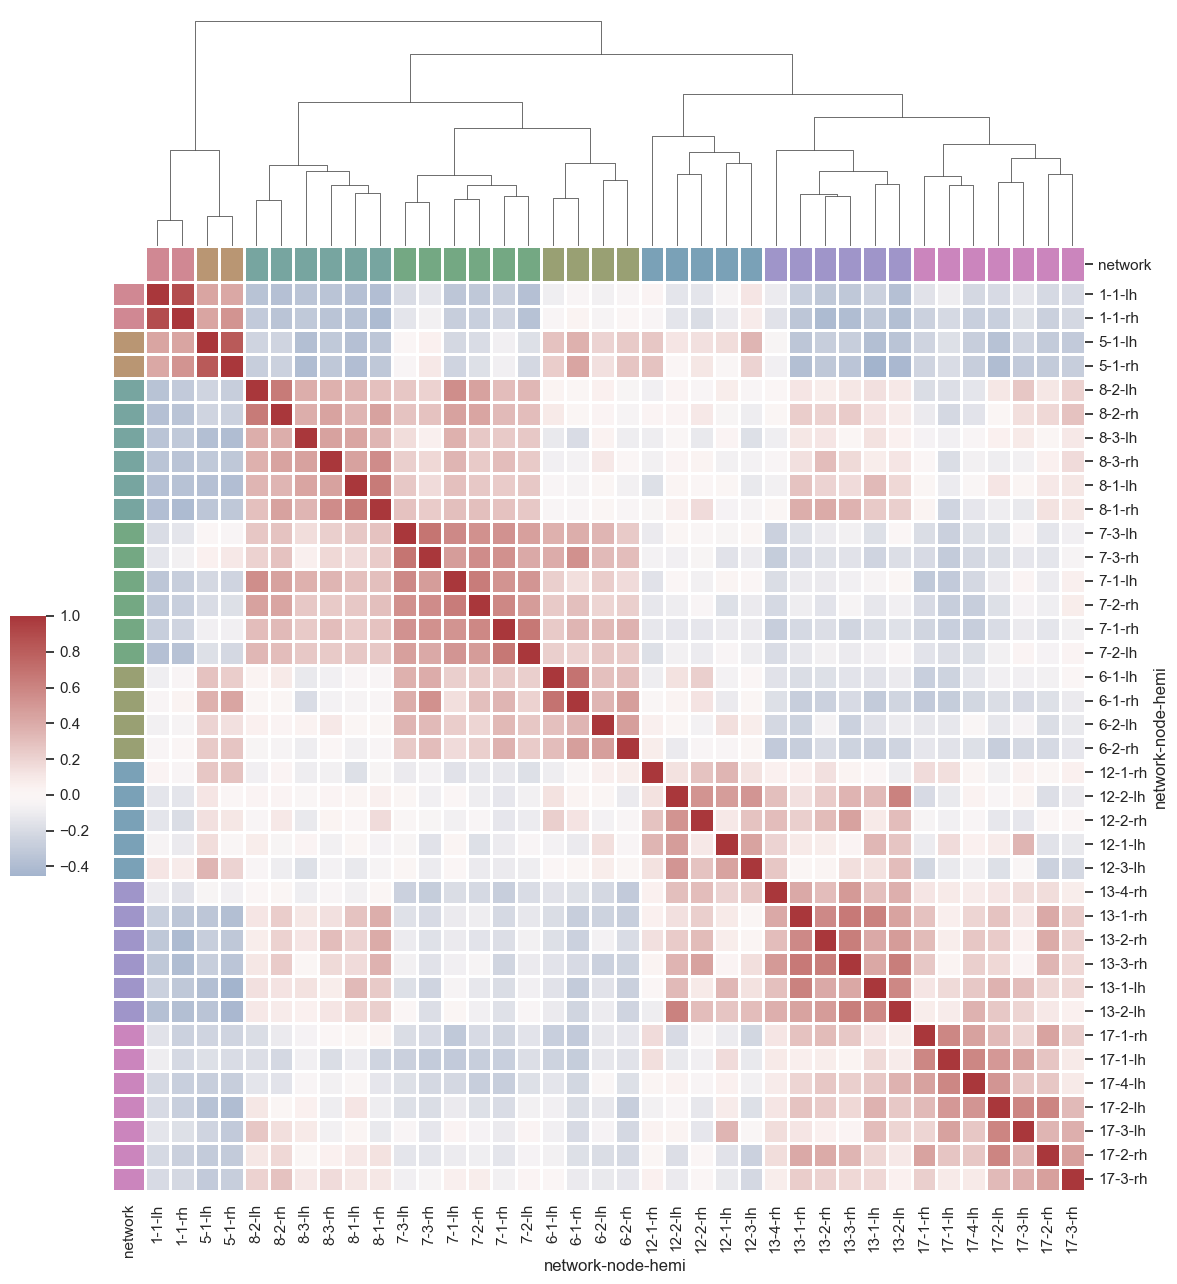

In [ ]:
sns.set_theme()

# Load the brain networks example dataset
df = pd.read_csv("seaborn-data/brain_networks.csv", header=[0, 1, 2], index_col=0)
display(df.sample(10))

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)    # 生成8个HUSL颜色（对应8个网络）
network_lut = dict(zip(map(str, used_networks), network_pal))   # 创建网络编号到颜色的映射字典

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)     #     提取所有列对应的网络编号. 创建Series并用颜色字典映射，得到每列对应的颜色

# Draw the full plot
g = sns.clustermap(
    df.corr(),                  # 计算相关系数矩阵
    center=0,                   # 颜色中心点为0
    cmap="vlag",                # 使用红-蓝渐变色系, "vlag"色系特别适合显示相关系数（红色正相关，蓝色负相关）
    row_colors=network_colors,  # 行侧边颜色
    col_colors=network_colors,  # 列侧边颜色  
    dendrogram_ratio=(.1, .2),  # 树状图所占比例
    cbar_pos=(.02, .32, .03, .2), # 颜色条位置
    linewidths=.75,             # 单元格边界线宽
    figsize=(12, 13)            # 图像大小
)
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

# 由于行列是对称的相关系数矩阵，行聚类与列聚类结果相同
# 移除行树状图避免重复显示
g.ax_row_dendrogram.remove()

### 可视化效果解读
最终得到的图形包含：
1. 主热图：显示不同脑网络间的相关性
2. 列树状图：显示网络的层次聚类结果
3. 侧边颜色条：标识不同网络分组
4. 颜色条：显示相关系数值与颜色的对应关系

这种可视化特别适合：
- 发现脑网络之间的功能连接模式
- 识别高度相关的网络组
- 观察正/负相关关系分布
- 通过聚类结果发现潜在的网络组织结构